In [ ]:
!pip install numpy pandas tensorflow keras matplotlib scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:

!pip show tensorflow


Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tf_keras


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
from keras import layers, models

In [ ]:
import pandas as pd
import yfinance as yf

# Download data (example for reference)
startdate="2020-01-01"
enddate="2025-01-01"
df = yf.download("CL=F",startdate,enddate)

# Flatten MultiIndex column names
df.columns = df.columns.get_level_values(0)  # Keep only the first level of MultiIndex

# Reset index to make 'Date' a column
df.reset_index(inplace=True)

# Ensure correct column order
df = df[['Date', 'Close', 'High', 'Low', 'Open', 'Volume']]

# Convert all except 'Date' to float
df[['Close', 'High', 'Low', 'Open', 'Volume']] = df[['Close', 'High', 'Low', 'Open', 'Volume']].astype(float)

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Print to check
print(df.dtypes)
print(df.head())


[*********************100%***********************]  1 of 1 completed

Price
Date      datetime64[ns]
Close            float64
High             float64
Low              float64
Open             float64
Volume           float64
dtype: object
Price       Date      Close       High        Low       Open     Volume
0     2020-01-02  61.180000  61.599998  60.639999  61.599998   486873.0
1     2020-01-03  63.049999  64.089996  61.130001  61.180000   885861.0
2     2020-01-06  63.270000  64.720001  62.639999  63.709999   724236.0
3     2020-01-07  62.700001  63.150002  62.110001  62.910000   582649.0
4     2020-01-08  59.610001  65.650002  59.150002  62.840000  1205710.0


In [ ]:
df.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [ ]:
# Select relevant features
features = df[['Open', 'Close', 'Low', 'High', 'Volume']].values
print(features)
# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
print(features_scaled)
# Create labels based on the closing price
labels = (df['Close'].shift(-1) >= df['Close']).astype(int).values[:-1]  # 1 for rise, 0 for fall

# Remove the last row since it has no label
features_scaled = features_scaled[:-1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

[[6.15999985e+01 6.11800003e+01 6.06399994e+01 6.15999985e+01
  4.86873000e+05]
 [6.11800003e+01 6.30499992e+01 6.11300011e+01 6.40899963e+01
  8.85861000e+05]
 [6.37099991e+01 6.32700005e+01 6.26399994e+01 6.47200012e+01
  7.24236000e+05]
 ...
 [6.96800003e+01 7.05999985e+01 6.94400024e+01 7.07500000e+01
  1.72641000e+05]
 [7.04199982e+01 7.09899979e+01 7.01200027e+01 7.15599976e+01
  1.99296000e+05]
 [7.11500015e+01 7.17200012e+01 7.08700027e+01 7.20199966e+01
  1.51155000e+05]]
[[-4.68206379e-01 -4.85235446e-01 -4.49027778e-01 -5.27521723e-01
   7.00308994e-01]
 [-4.89080777e-01 -3.92580619e-01 -4.24446585e-01 -4.05217965e-01
   2.98512055e+00]
 [-3.63336892e-01 -3.81679984e-01 -3.48696720e-01 -3.74273374e-01
   2.05957224e+00]
 ...
 [-6.66208810e-02 -1.84927709e-02 -7.57096782e-03 -7.80917911e-02
  -1.09914589e+00]
 [-2.98421257e-02  8.30943939e-04  2.65416074e-02 -3.83063171e-02
  -9.46505579e-01]
 [ 6.43989106e-03  3.70011973e-02  6.41657543e-02 -1.57120742e-02
  -1.22218583e+00]

In [ ]:
import tensorflow as tf

# Example input (batch_size=4, feature_dim=96)
x = tf.random.uniform((4, 96))  # Ensure x has the correct shape

# Expand dims (add sequence length = 1)
x_expanded = tf.expand_dims(x, axis=1)  # Shape: (batch_size, seq_length=1, feature_dim)

# MultiHeadAttention with proper dimensions
attention_layer = layers.MultiHeadAttention(num_heads=12, key_dim=8)
attention_output = attention_layer(x_expanded, x_expanded)  # Ensure both inputs match

print(attention_output.shape)  # Expected: (batch_size, seq_length, feature_dim)


(4, 1, 96)


In [ ]:
def create_sequences(features, labels, time_steps=30):
    X, y = [], []
    for i in range(len(features) - time_steps):
        X.append(features[i:i + time_steps])
        y.append(labels[i + time_steps])
    return np.array(X), np.array(y)

# Create sequences
time_steps = 30
X_sequences, y_sequences = create_sequences(features_scaled, labels, time_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (981, 30, 5)
y_train shape: (981,)
X_test shape: (246, 30, 5)
y_test shape: (246,)


In [ ]:
def create_dct_model(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Inception Convolutional Token Embedding
    x = layers.Conv1D(filters=32, kernel_size=1, activation='relu')(inputs)
    x = layers.Conv1D(filters=64, kernel_size=1, activation='relu')(x)
    x = layers.Conv1D(filters=128, kernel_size=1, activation='relu')(x)

    # Separable Fully Connected Layer
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.2)(x)

    # Reshape for Multi-Head Attention
    x = layers.Reshape((1, 128))(x)  # Reshape to (batch_size, 1, features)

    # Multi-Head Attention
    # Wrap tf.expand_dims in a Lambda layer
    x_expanded = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(x)
    attention_output = layers.MultiHeadAttention(num_heads=12, key_dim=8)(x_expanded, x_expanded)

    x = layers.Flatten()(attention_output)  # Flatten the output of attention

    # Output Layer for Binary Classification
    outputs = layers.Dense(1, activation='sigmoid')(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5371 - loss: 0.6929 - val_accuracy: 0.4822 - val_loss: 0.7050
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5541 - loss: 0.6830 - val_accuracy: 0.4873 - val_loss: 0.6986
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5623 - loss: 0.6864 - val_accuracy: 0.4822 - val_loss: 0.7054
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5526 - loss: 0.6873 - val_accuracy: 0.4822 - val_loss: 0.7138
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5634 - loss: 0.6821 - val_accuracy: 0.5228 - val_loss: 0.7007
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5928 - loss: 0.6615 - val_accuracy: 0.4772 - val_loss: 0.6992
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5907 - loss: 0.6530 - val_accuracy: 0.4873 - val_loss: 0.7296
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6121 - loss: 0.6457 - val_accuracy: 0.4315 - val_lo

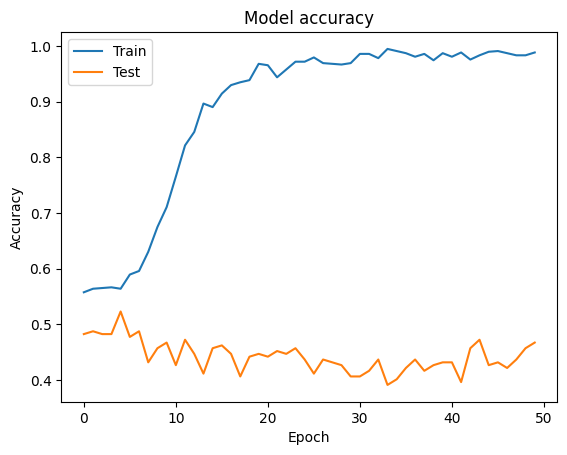

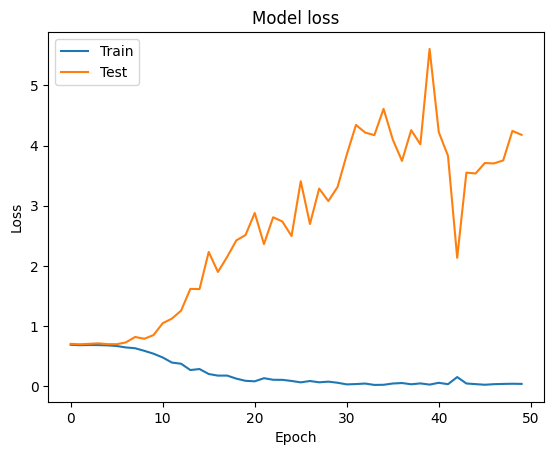

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

# Select relevant features
features = df[['Open', 'Close', 'Low', 'High', 'Volume']].values

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Create labels based on the closing price
labels = (df['Close'].shift(-1) >= df['Close']).astype(int).values[:-1]  # 1 for rise, 0 for fall

# Remove the last row since it has no label
features_scaled = features_scaled[:-1]

# Create sequences for time series
def create_sequences(features, labels, time_steps=30):
    X, y = [], []
    for i in range(len(features) - time_steps):
        X.append(features[i:i + time_steps])
        y.append(labels[i + time_steps])
    return np.array(X), np.array(y)

# Create sequences
time_steps = 30
X_sequences, y_sequences = create_sequences(features_scaled, labels, time_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=42)

# Define the DCT model
def create_dct_model(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Inception Convolutional Token Embedding
    x = layers.Conv1D(filters=32, kernel_size=1, activation='relu')(inputs)
    x = layers.Conv1D(filters=64, kernel_size=1, activation='relu')(x)
    x = layers.Conv1D(filters=128, kernel_size=1, activation='relu')(x)

    # Separable Fully Connected Layer
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.2)(x)

    # Reshape for Multi-Head Attention
    x = layers.Reshape((1, 128))(x)  # Reshape to (batch_size, 1, features)

    # Multi-Head Attention
    attention_output = layers.MultiHeadAttention(num_heads=12, key_dim=8)(x, x)
    x = layers.Flatten()(attention_output)  # Flatten the output of attention

    # Output Layer for Binary Classification
    outputs = layers.Dense(1, activation='sigmoid')(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Create the model
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, features)
dct_model = create_dct_model(input_shape)

# Compile the model
dct_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = dct_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = dct_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.4914 - loss: 4.9615 - val_accuracy: 0.4822 - val_loss: 3.8058 - learning_rate: 5.0000e-04
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5668 - loss: 3.4943 - val_accuracy: 0.5025 - val_loss: 2.7944 - learning_rate: 5.0000e-04
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5641 - loss: 2.5973 - val_accuracy: 0.5279 - val_loss: 2.1846 - learning_rate: 5.0000e-04
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6283 - loss: 2.0321 - val_accuracy: 0.5127 - val_loss: 1.8296 - learning_rate: 5.0000e-04
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7037 - loss: 1.6725 - val_accuracy: 0.4619 - val_loss: 1.6334 - learning_rate: 5.0000e-04
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7170 - loss: 1.4634 - val_accuracy: 0.4569 - val_loss: 1.5269 - learning_rate: 5.0000e-04
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7427 

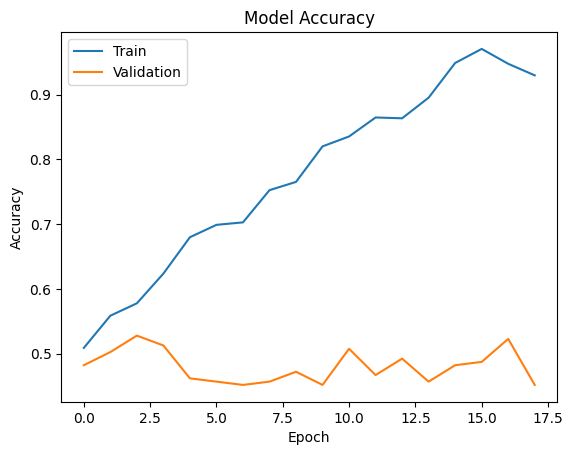

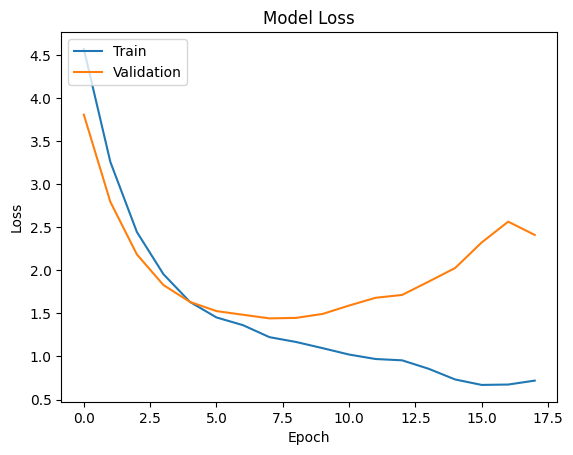

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, callbacks

# Select relevant features
features = df[['Open', 'Close', 'Low', 'High', 'Volume']].values

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Create labels based on the closing price
labels = (df['Close'].shift(-1) >= df['Close']).astype(int).values[:-1]
features_scaled = features_scaled[:-1]  # Remove last row due to label shift

# Create sequences for time series
def create_sequences(features, labels, time_steps=30):
    X, y = [], []
    for i in range(len(features) - time_steps):
        X.append(features[i:i + time_steps])
        y.append(labels[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 30
X_sequences, y_sequences = create_sequences(features_scaled, labels, time_steps)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=42)

# Define the improved DCT model
def create_dct_model(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Inception-like Conv1D with Batch Normalization
    x = layers.Conv1D(filters=32, kernel_size=1, activation='relu', kernel_regularizer=regularizers.l2(0.01))(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Conv1D(filters=64, kernel_size=1, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv1D(filters=128, kernel_size=1, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.BatchNormalization()(x)

    # Flatten & Fully Connected Layers
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.Dropout(0.3)(x)

    # Reshape for Multi-Head Attention
    x = layers.Reshape((1, 128))(x)  # Reshape to (batch_size, 1, features)

    # Multi-Head Attention
    attention_output = layers.MultiHeadAttention(num_heads=8, key_dim=16)(x, x)
    x = layers.Flatten()(attention_output)

    # Final Dense Layers
    x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(1, activation='sigmoid')(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Create the model
input_shape = (X_train.shape[1], X_train.shape[2])
dct_model = create_dct_model(input_shape)

dct_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Callbacks
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the model
history = dct_model.fit(X_train, y_train, epochs=50, batch_size=16,
                        validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Evaluate the model
test_loss, test_accuracy = dct_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plot Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, MultiHeadAttention, LayerNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers.schedules import CosineDecay

# Define input shape
input_shape = (None, 5)  # Assuming 5 features like Open, High, Low, Close, Volume

# Build model
def create_model():
    inputs = tf.keras.Input(shape=input_shape)
    x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(inputs)
    x = Dropout(0.4)(x)

    # Multi-Head Attention Layer
    attn_output = MultiHeadAttention(num_heads=4, key_dim=4)(x, x)
    x = LayerNormalization()(x + attn_output)

    x = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.4)(x)
    outputs = Dense(1, activation='sigmoid')(x)  # Binary classification (Buy/Sell)

    model = tf.keras.Model(inputs, outputs)
    return model

# Learning rate schedule
lr_schedule = CosineDecay(initial_learning_rate=5e-4, decay_steps=50, alpha=0.1)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile model
model = create_model()
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]

# Train model
history = model.fit(
    train_data, train_labels,
    validation_data=(val_data, val_labels),
    epochs=50,
    batch_size=8,  # Smaller batch size for better generalization
    callbacks=callbacks
)

# Evaluate model
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")


NameError: name 'train_data' is not defined